Epoch 1/200
3/3 [==============================] - 0s 37ms/step - loss: 0.9458 - val_loss: 2.3029
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 0.8760 - val_loss: 2.1653
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8105 - val_loss: 2.0399
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 0.7596 - val_loss: 1.9218
Epoch 5/200
3/3 [==============================] - 0s 9ms/step - loss: 0.7092 - val_loss: 1.8197
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6644 - val_loss: 1.7137
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 0.6246 - val_loss: 1.6224
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 0.5846 - val_loss: 1.5410
Epoch 9/200
3/3 [==============================] - 0s 11ms/step - loss: 0.5495 - val_loss: 1.4643
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 0.5148 - val_loss: 1.3858
Epoch 11/200
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.0634 - val_loss: 0.0961
Epoch 85/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0626 - val_loss: 0.1005
Epoch 86/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0620 - val_loss: 0.1070
Epoch 87/200
3/3 [==============================] - 0s 6ms/step - loss: 0.0613 - val_loss: 0.1095
Epoch 88/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0608 - val_loss: 0.1092
Epoch 89/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0597 - val_loss: 0.1008
Epoch 90/200
3/3 [==============================] - 0s 6ms/step - loss: 0.0591 - val_loss: 0.0952
Epoch 91/200
3/3 [==============================] - 0s 6ms/step - loss: 0.0586 - val_loss: 0.0914
Epoch 92/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0583 - val_loss: 0.0996
Epoch 93/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0572 - val_loss: 0.0990
Epoch 94/200
3/3 [===============

3/3 [==============================] - 0s 7ms/step - loss: 0.0277 - val_loss: 0.0978
Epoch 168/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0273 - val_loss: 0.0956
Epoch 169/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.0963
Epoch 170/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0268 - val_loss: 0.0961
Epoch 171/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0266 - val_loss: 0.1011
Epoch 172/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0265 - val_loss: 0.1098
Epoch 173/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0263 - val_loss: 0.1044
Epoch 174/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0260 - val_loss: 0.0925
Epoch 175/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.0847
Epoch 176/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0259 - val_loss: 0.0894
Epoch 177/200
3/3 [=====

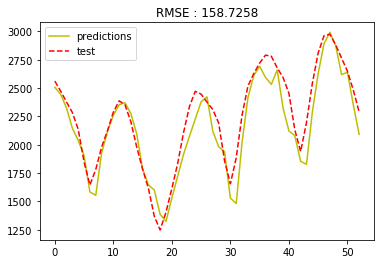

In [1]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers,optimizers
from sklearn.metrics import mean_squared_error as MSE

# 读取数据
def read_data(datapath):
    # read data
    data1 = pd.read_csv(datapath,index_col=0)
    # 填充或者删去
    data1.fillna(method='pad',inplace=True)      # 填充
    # data.dropna(inplace = True)                 # 删去
    return data1

# 分割数据
def splitdata(data,Sequence_length,horizon):
    all_data = []
    for dta in range(len(data) - sequence_length -horizon + 1):
        all_data.append(data[dta : dta + sequence_length])

    all_data = np.array(all_data)
    ydata = data[(horizon + sequence_length -1) :]
    ydata = list(ydata)

    # 加入y变量
    all_data = pd.DataFrame(all_data)
    all_data['y'] = ydata
    all_data.to_excel('timeseries1.xlsx')
    all_data = np.array(all_data)

    # split data-训练数据、验证数据、测试数据比例0.6/0.2/0.2
    # round函数-进行四舍五入转化的
    row_1 =round(0.4 * int(all_data.shape[0]))
    row_2 = round(0.2 * int(all_data.shape[0]))

    x_train_initial = all_data[:-int(row_1),:-1]
    y_train_initial = all_data[:-int(row_1),-1]

    x_val_initial = all_data[-int(row_1):-int(row_2),:-1]
    y_val_initial = all_data[-int(row_1):-int(row_2),-1]

    x_test_initial = all_data[-int(row_2):,:-1]
    y_test_initial = all_data[-int(row_2):,-1]

    return x_train_initial,y_train_initial,x_val_initial,y_val_initial,x_test_initial,y_test_initial


# 标准化处理
def standard(x_train_initial,y_train_initial,x_val_initial,y_val_initial,x_test_initial,y_test_initial):
    x_scaler = StandardScaler()
    y_scale = StandardScaler()

    # 分别对x与y进行标准化
    x_train = x_scaler.fit_transform(x_train_initial)
    x_val = x_scaler.transform(x_val_initial)
    x_test = x_scaler.transform(x_test_initial)

    y_train = y_scale.fit_transform(y_train_initial.reshape(-1,1))
    y_val = y_scale.transform(y_val_initial.reshape(-1,1))
    y_test = y_scale.transform(y_test_initial.reshape(-1,1))

    # 生成正式的数据格式
    amount_of_features = 1
    x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],amount_of_features))
    x_val = np.reshape(x_val,(x_val.shape[0],x_val.shape[1],amount_of_features))
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],amount_of_features))

    return x_train,y_train,x_val,y_val,x_test,y_test

# keras 版本模型
def get_uncompiled_model():

    inputs = tf.keras.Input(shape=(10,),name = 'digits')             

    x = layers.Dense(24,activation='relu',name='dense_1')(inputs)   
    x = layers.Dense(8,activation='relu',name='dense_2')(x)                                                
    x = layers.Dense(1,name='dense_3')(x)

    model = tf.keras.Model(inputs=inputs,outputs=x)

    return model

# 转换到标准化前的格式
def inverse_data(y_train_initial,y_pre,y_test):
    y_scale = StandardScaler()
    y_scale = y_scale.fit(y_train_initial.reshape(-1,1))
    y_pre = y_scale.inverse_transform(y_pre)
    y_test = y_scale.inverse_transform(y_test)

    return y_pre,y_test

if __name__ == '__main__':
    # 读取数据-dataframe
    index = 'value'
    path = 'timeseries.csv'
    sequence_length = 10           # 序列长度
    horizon = 1                    # 移动的步长
    data = read_data(path)[index]
    # 分割数据
    x_train_initial,y_train_initial,x_val_initial,y_val_initial,x_test_initial,y_test_initial = splitdata(data,sequence_length,horizon=horizon)
    # 标准化
    x_train,y_train,x_val,y_val,x_test,y_test = standard(x_train_initial,y_train_initial,x_val_initial,y_val_initial,x_test_initial,y_test_initial)

    # print('size = ',y_test.size)

    # 训练模型
    model = get_uncompiled_model()
    # model.compile()模型配置损失和度量、优化器
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='mean_squared_error',
                 )
    
    
    # model.fit()对模型进行训练
    history = model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_val,y_val))
    # model.predict()对模型进行预测
    y_pre = model.predict(x_test)
    print('y_pre = ',y_pre)
    # model.summary()

    # 转换到原来的数据格式
    y_pre_rel,y_test_rel = inverse_data(y_train_initial,y_pre,y_test)

    y_pre_rel = np.array(y_pre_rel).reshape(-1,1)
    y_test_rel = np.array(y_test_rel).reshape(-1,1)

    # rmse
    rmse = np.sqrt(MSE(y_pre_rel,y_test_rel))

    # 画图
    # pd.Series()
    fig = plt.figure()
    plt.plot(y_pre_rel,'y-',label='predictions')
    plt.plot(y_test_rel,'r--',label='test')
    plt.legend(loc = 'best')
    plt.title('RMSE : %.4f'%(rmse))
    plt.show()


In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 24)                264       
                                                                 
 dense_2 (Dense)             (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [3]:
history.history

{'loss': [0.9457796216011047,
  0.8759992718696594,
  0.8105028867721558,
  0.7596172094345093,
  0.7091783285140991,
  0.664415717124939,
  0.6246083378791809,
  0.5846158266067505,
  0.5495489835739136,
  0.514776349067688,
  0.48259100317955017,
  0.45732444524765015,
  0.4311762750148773,
  0.4085460603237152,
  0.38471904397010803,
  0.3639522194862366,
  0.3436335027217865,
  0.3253633975982666,
  0.30709195137023926,
  0.2893495559692383,
  0.2720247209072113,
  0.2563549876213074,
  0.24159696698188782,
  0.22757916152477264,
  0.21386060118675232,
  0.20102763175964355,
  0.18860888481140137,
  0.17763185501098633,
  0.167740136384964,
  0.15745852887630463,
  0.1493397206068039,
  0.14150173962116241,
  0.13389435410499573,
  0.12687024474143982,
  0.12254434823989868,
  0.11795420944690704,
  0.11340759694576263,
  0.10992656648159027,
  0.10835172981023788,
  0.10572172701358795,
  0.10289201885461807,
  0.1020960807800293,
  0.09943202883005142,
  0.09783941507339478,
  0.